# Implement Simple Linear Regression in Python Using Scikit-Learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import pickle

### Importing Data

In [3]:
df = pd.read_csv('Salary_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


### Analysing Data

In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


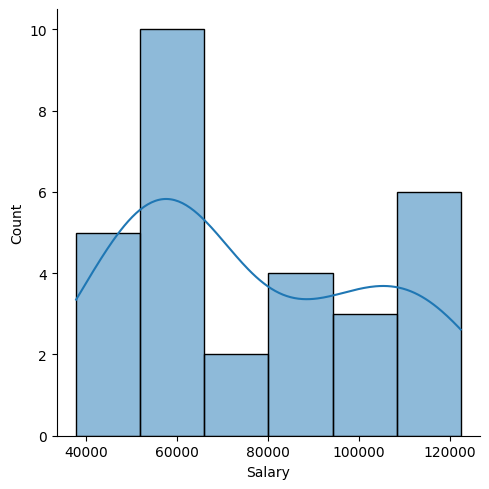

In [5]:
sns.displot(df['Salary'], kde=True)
plt.show()

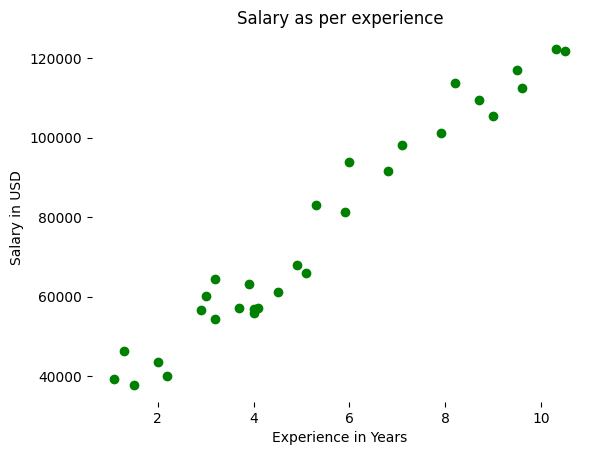

In [6]:
plt.scatter(df['YearsExperience'], df['Salary'], color='green')
plt.title("Salary as per experience")
plt.xlabel("Experience in Years")
plt.ylabel("Salary in USD")
plt.box(False)
plt.show()

### Spliting Data into X and Y

In [7]:
X = df.iloc[:,:1]
y = df.iloc[:,1:]

### Spliting into Train/Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Scaling Y Data

In [11]:
scalar = MinMaxScaler()
y_scaled_train = scalar.fit_transform(y_train)
y_scaled_test = scalar.transform(y_test)

### Fitting the Regression Model on Training Data

In [12]:
model = LinearRegression()
model.fit(X_train, y_scaled_train)

LinearRegression()

### Predicting and Evaluating

In [13]:
pred = model.predict(X_test)

In [14]:
lin_rmse = np.sqrt(mean_squared_error(pred,y_scaled_test))
print("The Mean Absolute Error of our Model is {}".format(round(lin_rmse, 2)))

The Mean Absolute Error of our Model is 0.07


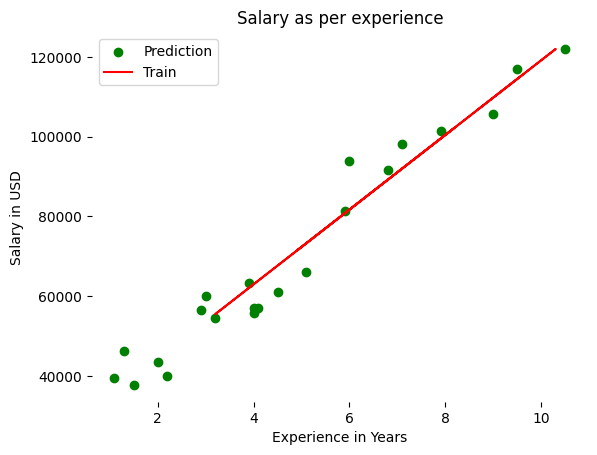

In [27]:
plt.scatter(X_train, scalar.inverse_transform(y_scaled_train), color='green')
plt.plot(X_test, scalar.inverse_transform(pred), color='red')
plt.title('Salary as per experience')
plt.xlabel("Experience in Years")
plt.ylabel("Salary in USD")
plt.legend(['Prediction', 'Train'])
plt.box(False)
plt.show()
plt.savefig('linear_regression_plot.png')

### Saving Model

In [16]:
filename = 'Regression_Model.sav'
pickle.dump(model, open(filename, 'wb'))

### Loading Model

In [17]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_scaled_test)
print(result)

0.9347210011126783
